In [1]:
import torch
from PIL import Image

In [2]:
import numpy as np
# %matplotlib notebook
import matplotlib.pyplot as plt

In [74]:
%%time
file = np.load('./annotations/eval_cs4pc_upsampled_512_val_weighted.npy', allow_pickle=True)#.item()['images']

CPU times: user 139 ms, sys: 413 ms, total: 552 ms
Wall time: 551 ms


In [71]:
!ls -lah ./annotations/

total 46G
drwxrwxr-x  2 hkhachatrian hkhachatrian   42 Feb 23 10:10  .
drwxrwxr-x 26 hkhachatrian hkhachatrian   39 Feb 22 05:49  ..
-rw-rw-r--  1 hkhachatrian hkhachatrian 139K Feb 10 09:53  annotations_nightowls_coco.json
-rw-rw-r--  1 hkhachatrian hkhachatrian 1.5G Feb 20 12:12  cs4pc_14_val_for_eval.npy
-rw-rw-r--  1 hkhachatrian hkhachatrian 184M Feb 21 10:50  cs4pc_200_train.npy
-rw-rw-r--  1 hkhachatrian hkhachatrian  77M Feb 21 10:52  cs4pc_200_val.npy
-rw-rw-r--  1 hkhachatrian hkhachatrian 145M Feb 22 05:46  cs4pc_256_train.npy
-rw-rw-r--  1 hkhachatrian hkhachatrian  61M Feb 22 05:47  cs4pc_256_val.npy
-rw-rw-r--  1 hkhachatrian hkhachatrian 199M Feb 21 10:51  cs4pc_400_train.npy
-rw-rw-r--  1 hkhachatrian hkhachatrian  83M Feb 21 10:52  cs4pc_400_val.npy
-rw-rw-r--  1 hkhachatrian hkhachatrian 145M Feb 22 05:49  cs4pc_512_train.npy
-rw-rw-r--  1 hkhachatrian hkhachatrian  61M Feb 22 05:50  cs4pc_512_val.npy
-rw-rw-r--  1 hkhachatrian hkhachatrian 1.5G Feb 20 12:00  cs4pc_up

In [36]:
file.shape

(30,)

In [37]:
file[0]['patch_labels'].shape, file[0]['resized_img'].shape, file[0]['black_image'].shape, file[0]['patch_labels_14x14'].shape

((1024, 2048), (1024, 2048), (1024, 2048), (14, 14))

In [38]:
file[0]['patch_labels']

array([[21., 21., 21., ..., 11., 11., 11.],
       [21., 21., 21., ..., 11., 11., 11.],
       [21., 21., 21., ..., 11., 11., 11.],
       ...,
       [ 7.,  7.,  7., ...,  7.,  7.,  7.],
       [ 7.,  7.,  7., ...,  7.,  7.,  7.],
       [ 7.,  7.,  7., ...,  7.,  7.,  7.]])

In [39]:
file[0].keys()

dict_keys(['file_name', 'id', 'patch_labels', 'resized_img', 'black_image', 'patch_labels_14x14'])

In [40]:
np.unique(file[idx]['black_image'].flatten(), return_counts=True, )

(array([ 1,  3,  4,  5,  6,  7,  8,  9, 11, 13, 17, 19, 20, 21, 22, 23, 25,
        26, 32, 33], dtype=uint8),
 array([ 81534,  31634,  14587,   1606,    196, 813562, 116586,   1246,
        567944,   2227,  30935,   1165,   6587, 349589,    554,  27981,
          4530,  23938,   1632,  19119]))

In [41]:
file[idx]['file_name']

'/mnt/lwll/lwll-coral/hrant/leftImg8bit/val/munster/munster_000028_000019_leftImg8bit.png'

In [46]:
import cv2

In [42]:
idx = 0

In [43]:
idx += 1

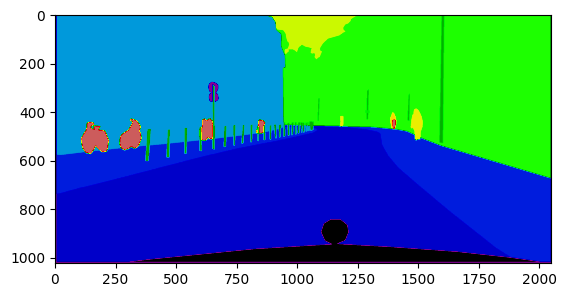

In [75]:
plt.figure()
plt.imshow(file[idx]['black_image'], cmap='nipy_spectral', vmax=34);
# idx += 1

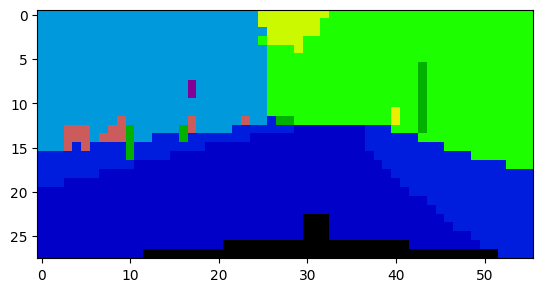

In [76]:
x = cv2.resize(file[idx]['black_image'], (56, 28), interpolation=cv2.INTER_NEAREST_EXACT)
plt.imshow(x, cmap='nipy_spectral', vmax=34);

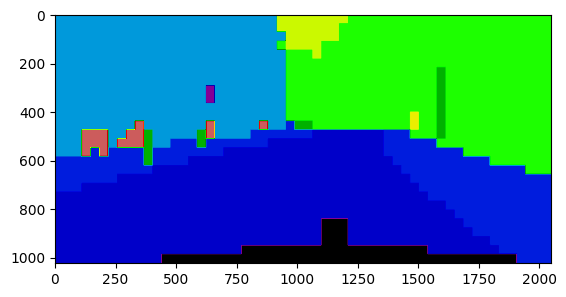

In [77]:
x = cv2.resize(x, (2048, 1024), interpolation=cv2.INTER_NEAREST_EXACT)
plt.imshow(x, cmap='nipy_spectral', vmax=34);

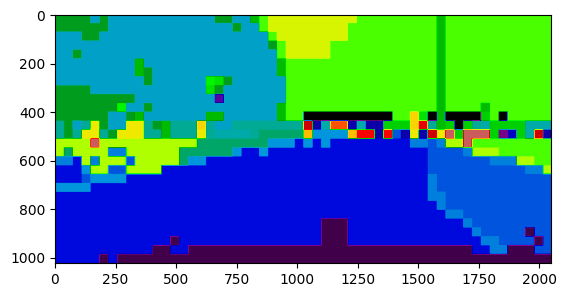

In [78]:
plt.figure()
plt.imshow(file[idx]['patch_labels'], cmap='nipy_spectral', vmax=34);

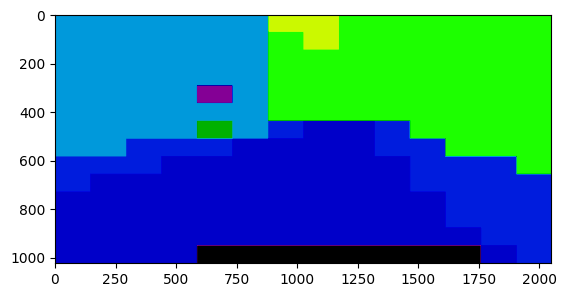

In [69]:
plt.imshow(file[idx]['resized_img'], cmap='nipy_spectral', vmax=34);


In [ ]:
np.unique(file[idx]['patch_labels'].flatten(), return_counts=True)

In [ ]:
plt.imshow(file[idx]['patch_labels'], cmap='nipy_spectral', vmax=34);
# idx += 1

In [4]:
import os
import cv2
from tqdm import tqdm

In [8]:
saving_path_400 = '/home/hkhachatrian/mae/evaluation/cs/cs4pc_400/val_pred'
# saving_path_wo = '/home/hkhachatrian/mae/evaluation/cs/cs_wo_crop_400/val_pred'
# saving_path_400_gt = '/home/hkhachatrian/mae/evaluation/cs/gt/val'

os.makedirs(saving_path_400, exist_ok=True)
os.makedirs(saving_path_wo, exist_ok=True)
os.makedirs(saving_path_400_gt, exist_ok=True)


for ann in tqdm(file):
    file_name = ann['file_name'].split('/')[-1].strip()
    
    path = os.path.join(saving_path_400, file_name)
    cv2.imwrite(path, ann['patch_labels'])

#     path = os.path.join(saving_path_wo, file_name)
#     cv2.imwrite(path, ann['resized_img'])
        
#     path = os.path.join(saving_path_400_gt, file_name)
#     cv2.imwrite(path, ann['black_image'])

100%|████████████████████████████████████████████████| 30/30 [00:00<00:00, 84.80it/s]


In [ ]:
im = Image.open('/home/hkhachatrian/mae/evaluation/cs/cs4pc_200/train/bochum_000000_024343_leftImg8bit.png')

In [ ]:
im

In [ ]:
path